--- FITS File Structure ---
Filename: frame-g-001000-1-0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [48896E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
------------------------------
--- Header Metadata (First 10 cards) ---
SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Ext

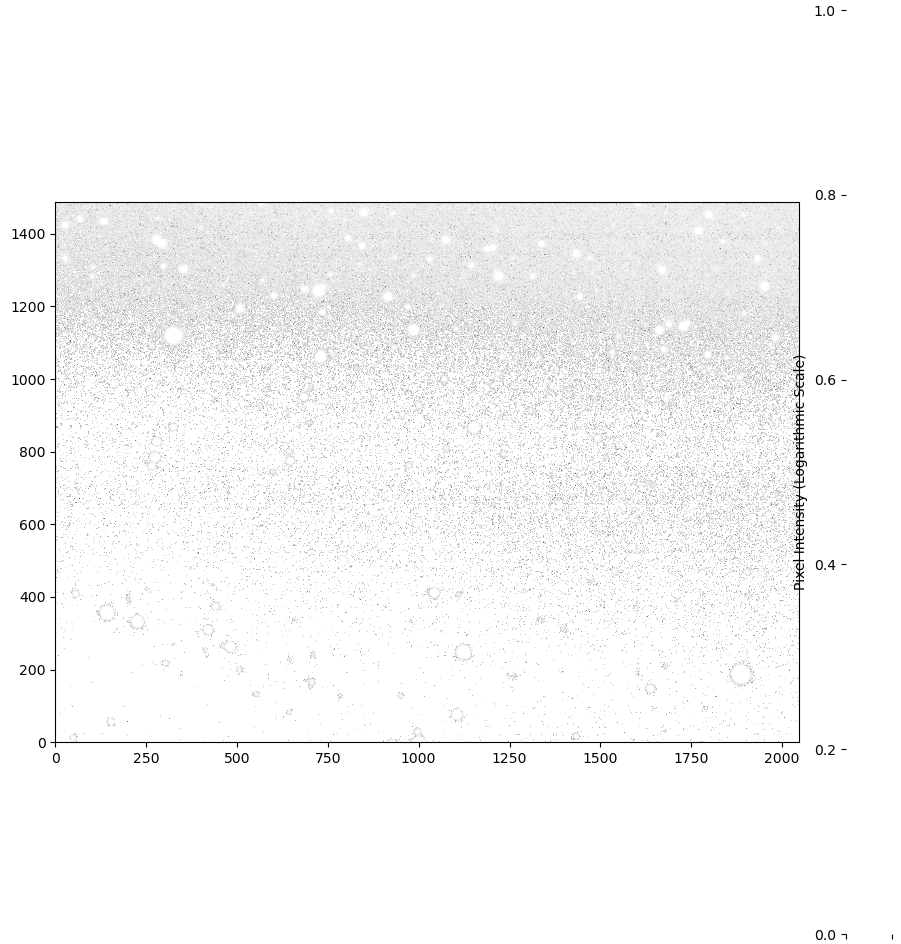

In [1]:
# ==============================================================================
#                 FITS File Viewer & Debugging Script
# ==============================================================================
#
# Description:
#   This script opens a astronomical FITS file, inspects its structure and
#   metadata, and saves a visual representation of the primary image data
#   as a PNG file. It is designed to work in any environment, including
#   headless servers and Docker containers, by saving the output instead
#   of displaying it in a GUI.
#
# Usage:
#   1. Make sure you have a .fits file in the same directory as this script.
#   2. Change the FITS_FILENAME variable below to match your file's name.
#   3. Run from the terminal: python view_fits.py
#
# Requirements:
#   pip install astropy matplotlib numpy
#
# ==============================================================================

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # For better contrast in astronomical images
from astropy.io import fits

# --- Configuration ---
# IMPORTANT: Replace this with the name of a FITS file in the same directory.
FITS_FILENAME = "frame-g-001000-1-0027.fits"
OUTPUT_FILENAME = "visualization.png"

# --- Main Script ---
def analyze_and_visualize_fits(fits_path, output_path):
    """
    Opens, analyzes, and saves a visualization of a FITS file.
    """
    if not os.path.exists(fits_path):
        print(f"Error: File not found at '{fits_path}'")
        return

    hdul = None  # Initialize to ensure it's defined for the 'finally' block
    try:
        # 1. Open the FITS file using a context manager
        with fits.open(fits_path) as hdul:
            print("--- FITS File Structure ---")
            hdul.info()
            print("-" * 30)

            # 2. Select the primary image data unit (HDU)
            # This is typically the first HDU in the list, at index 0.
            primary_hdu = hdul[0]

            # 3. Access the header metadata
            header = primary_hdu.header
            print("--- Header Metadata (First 10 cards) ---")
            for i, card in enumerate(header.cards):
                if i >= 10: break
                print(card)
            
            # Extract specific, useful metadata if it exists
            object_name = header.get('OBJECT', 'N/A')
            exposure_time = header.get('EXPTIME', 'N/A')
            print(f"\nExtracted Object Name: {object_name}")
            print(f"Extracted Exposure Time: {exposure_time}s")
            print("-" * 30)

            # 4. Access the image data as a NumPy array
            image_data = primary_hdu.data

            # 5. Validate the data
            if image_data is None:
                print("Error: No image data found in the primary HDU.")
                return

            print("--- Image Data Analysis ---")
            print(f"Data type: {image_data.dtype}")
            print(f"Dimensions (shape): {image_data.shape}")
            print(f"Minimum pixel value: {np.nanmin(image_data):.2f}")
            print(f"Maximum pixel value: {np.nanmax(image_data):.2f}")
            print(f"Mean pixel value: {np.nanmean(image_data):.2f}")
            print("-" * 30)

            # 6. Create and save the visualization
            print(f"Generating visualization... ")
            plt.figure(figsize=(12, 12))

            # Use robust percentile scaling for good contrast, and a LogNorm
            # This handles the huge dynamic range of astronomical images.
            vmin, vmax = np.nanpercentile(image_data, [5, 98.5])
            
            plt.imshow(
                image_data, 
                cmap='gray', 
                norm=LogNorm(vmin=vmin, vmax=vmax),
                origin='lower' # 'lower' puts (0,0) in the bottom-left corner, standard for images
            )
            
            plt.colorbar(label='Pixel Intensity (Logarithmic Scale)')
            plt.title(f"Object: {object_name} ({fits_path})", fontsize=14)
            plt.xlabel('X Pixel Coordinate')
            plt.ylabel('Y Pixel Coordinate')
            plt.grid(False)

            # Save the figure to a file instead of showing it
            plt.savefig(output_path, dpi=150, bbox_inches='tight')

            print(f"Success! Visualization saved to '{output_path}'")

    except FileNotFoundError:
        print(f"Error: FITS file not found at '{fits_path}'")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    analyze_and_visualize_fits(FITS_FILENAME, OUTPUT_FILENAME)